In [1]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=5000)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="query arxiv for research papers")


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogrammable silicon photonics has also found new applications in quantum2 and\nclassical 3 information processing. A key component of programmable silicon\nphotonic integrated circuits (PICs) is the phase shifter, traditionally\nrealized via the thermo-optic or plasma dispersion effect which are weak,\nvolatile, and power hungry. A non-volatile phase shifter can circumvent these\nlimitations by requiring zero power to maintain the switched phases. Previously\nnon-volatile phase modulation was

In [4]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.invoke("What is quantum computing?")

'Page: Quantum computing\nSummary: A quantum computer is a computer that exploits quantum mechanical phenomena. On small scales, physical matter exhibits properties of both particles and waves, and quantum computing takes advantage of this behavior using specialized hardware. Classical physics cannot explain the operation of these quantum devices, and a scalable quantum computer could perform some calculations exponentially faster than any modern "classical" computer. Theoretically a large-scale q'

In [5]:
wiki.name

'wikipedia'

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY") 
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily_search = TavilySearchResults()
tavily_search.invoke("What is the latest news on quantum computing?")

C:\Users\AHMED ABD ELGWAD\AppData\Local\Temp\ipykernel_19564\2455878858.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults()


[{'title': 'Breakthroughs in Quantum Computing - Wevolver',
  'url': 'https://www.wevolver.com/article/breakthroughs-in-quantum-computing',
  'content': 'Another recent pivotal development in the quantum computing field was the shift from emphasizing processor benchmarks to focusing on practical implementations. This transition is vital for transforming quantum computing from a theoretical concept into an applied technology with real-world applications. An updated analysis for 2023 projects indicates that industries like automotive, chemicals, financial services, and life sciences could see an economic impact of up to $1.3 trillion by 2035, [...] EurekAlert! UK Scientists make major breakthrough in developing practical quantum computers that can solve big challenges of our time. [Internet]. Washington: American Association for the Advancement of Science (AAAS). 2023 Feb 8. Available from: \n\n AWS and Harvard University researchers reported a breakthrough in quantum networking that imp

In [8]:
# Tools
tools = [arxiv, wiki, tavily_search]


In [9]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="llama-3.1-8b-instant"
)

In [10]:
llm.invoke("What is quantum computing?")  # Example invocation to test the model

AIMessage(content='Quantum computing is a new and emerging technology that uses the principles of quantum mechanics to perform calculations and operations on data. It\'s a revolutionary approach to computing that has the potential to solve complex problems much faster than classical computers.\n\n**Classical vs. Quantum Computing**\n\nClassical computers use "bits" to store and process information, which can have a value of either 0 or 1. This binary system is the foundation of all classical computing. However, as the number of bits increases, the number of possible combinations grows exponentially, leading to a limitation in processing power.\n\nQuantum computers, on the other hand, use "qubits" (quantum bits) to store and process information. Qubits are unique in that they can exist in multiple states simultaneously, known as a superposition. This means that a qubit can represent not just 0 and 1, but also any combination of 0 and 1 at the same time.\n\n**Key Principles of Quantum Co

In [11]:
llm_with_tools = llm.bind_tools(tools=tools)

# Example invocation with tools
llm_with_tools.invoke("What is the latest research on quantum computing?")  # Print the response from the model with tools

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'v8r38qhd3', 'function': {'arguments': '{"query":"quantum computing latest research"}', 'name': 'arxiv'}, 'type': 'function'}, {'id': '01h0cfsjw', 'function': {'arguments': '{"query":"quantum computing latest research"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 466, 'total_tokens': 502, 'completion_time': 0.059953547, 'prompt_time': 0.031185839, 'queue_time': 0.08705270500000001, 'total_time': 0.091139386}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b8d50f71-f873-4e31-b483-2bd4551db390-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing latest research'}, 'id': 'v8r38qhd3', 'type': 'tool_call'}, {'name': 'wikipedia', 'args': {'query': 'quantum computing latest research'}, 'id': '01h0cfsjw', 'type': 'tool_

In [12]:
llm_with_tools.invoke("What is the machine learning?")  # Print the response from the model with tools

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '2azw8qhjn', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 463, 'total_tokens': 478, 'completion_time': 0.028652448, 'prompt_time': 0.030987862, 'queue_time': 0.08688024, 'total_time': 0.05964031}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a760b36d-6bfc-490a-af82-4cc2bf237b0f-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': '2azw8qhjn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 463, 'output_tokens': 15, 'total_tokens': 478})

# Workflow


In [13]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [14]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [15]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

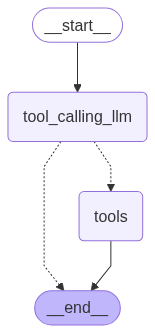

In [20]:
def tool_calling_llm(state:State):
    # Get the current state of the system
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Define the state graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", END)

# Build the state graph
graph = builder.compile()

# Display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
from langchain_core.messages import HumanMessage

message = graph.invoke({
    "messages": [HumanMessage(content="my name is John and I am a software engineer. What is quantum computing?")]
})

for m in message["messages"]:
    print(m.content)  # Print the content of each message
    # m.pretty_print()

my name is John and I am a software engineer. What is quantum computing?

Page: Quantum computing
Summary: A quantum computer is a computer that exploits quantum mechanical phenomena. On small scales, physical matter exhibits properties of both particles and waves, and quantum computing takes advantage of this behavior using specialized hardware. Classical physics cannot explain the operation of these quantum devices, and a scalable quantum computer could perform some calculations exponentially faster than any modern "classical" computer. Theoretically a large-scale q
Page: Software engineering
Summary: Software engineering is a branch of both computer science and engineering focused on designing, developing, testing, and maintaining software applications. It involves applying engineering principles and computer programming expertise to develop software systems that meet user needs.
The terms programmer and coder overlap software engineer, but they imply only the construction aspect of

d:\Langgraph\venv\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file d:\Langgraph\venv\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


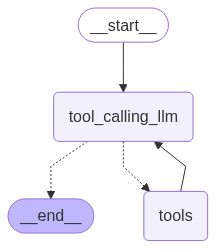

In [24]:
def tool_calling_llm(state:State):
    # Get the current state of the system
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Define the state graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", "tool_calling_llm")


# Build the state graph
graph = builder.compile()

# Display the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
from langchain_core.messages import HumanMessage

message = graph.invoke({
    "messages": [HumanMessage(content="my name is John and I am a software engineer. What is quantum computing?")]
})

for m in message["messages"]:
    # print(m.content)  # Print the content of each message
    m.pretty_print()

================================ Human Message =================================

my name is John and I am a software engineer. What is quantum computing?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (51nvvne4n)
 Call ID: 51nvvne4n
  Args:
    query: quantum computing
  wikipedia (zecykvzby)
 Call ID: zecykvzby
  Args:
    query: software engineer
================================= Tool Message =================================
Name: wikipedia

Page: Quantum computing
Summary: A quantum computer is a computer that exploits quantum mechanical phenomena. On small scales, physical matter exhibits properties of both particles and waves, and quantum computing takes advantage of this behavior using specialized hardware. Classical physics cannot explain the operation of these quantum devices, and a scalable quantum computer could perform some calculations exponentially faster than any modern "classical" computer. Theoretically a large